In [4]:
import cv2
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
from matplotlib import pyplot as plt
import skimage
import skimage.io
import json
import csv
import os.path
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


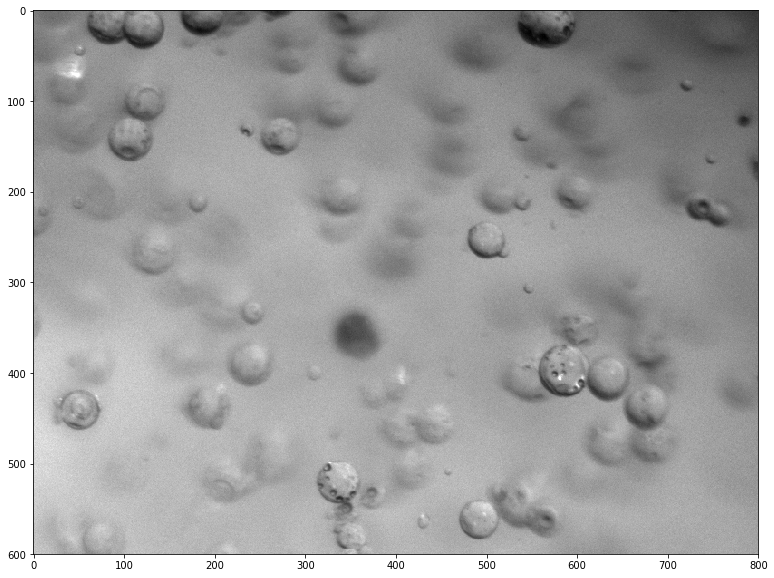

In [151]:
img_path = r"C:\Users\wuyua\Desktop\MicroVisionLabelling\Dataset\Batch 5\1523394853425.png"
img = skimage.io.imread(img_path)
plt.gray()
plt.imshow(img)

In [152]:
# load annotation

annotation = [];
target_file_path, target_file_name = os.path.split(img_path)
mask_file = os.path.join(target_file_path, "via_region_data.csv")

with open(mask_file, "r") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    annotation = [x[5] for x in reader if x[0] == target_file_name]

In [153]:
# create mask
mask = np.zeros((*img.shape, len(annotation)), dtype=np.uint8)
for i, ann in enumerate(annotation):
    ann_dict = json.loads(ann)
    print(ann_dict)
    rr, cc = skimage.draw.circle(ann_dict["cy"], ann_dict["cx"], ann_dict["r"], shape=img.shape)
    mask[rr, cc, i] = 1

{'name': 'circle', 'cx': 120, 'cy': 19, 'r': 22}
{'name': 'circle', 'cx': 84, 'cy': 14, 'r': 25}
{'name': 'circle', 'cx': 189, 'cy': 8, 'r': 23}
{'name': 'circle', 'cx': 362, 'cy': 62, 'r': 21}
{'name': 'circle', 'cx': 275, 'cy': 137, 'r': 22}
{'name': 'circle', 'cx': 123, 'cy': 101, 'r': 21}
{'name': 'circle', 'cx': 106, 'cy': 143, 'r': 24}
{'name': 'circle', 'cx': 52, 'cy': 43, 'r': 8}
{'name': 'circle', 'cx': 182, 'cy': 212, 'r': 11}
{'name': 'circle', 'cx': 50, 'cy': 440, 'r': 23}
{'name': 'circle', 'cx': 242, 'cy': 334, 'r': 13}
{'name': 'circle', 'cx': 241, 'cy': 389, 'r': 26}
{'name': 'circle', 'cx': 193, 'cy': 438, 'r': 21}
{'name': 'circle', 'cx': 283, 'cy': 53, 'r': 17}
{'name': 'circle', 'cx': 569, 'cy': 14, 'r': 33}
{'name': 'circle', 'cx': 721, 'cy': 81, 'r': 10}
{'name': 'circle', 'cx': 748, 'cy': 163, 'r': 7}
{'name': 'circle', 'cx': 737, 'cy': 215, 'r': 14}
{'name': 'circle', 'cx': 755, 'cy': 226, 'r': 12}
{'name': 'circle', 'cx': 598, 'cy': 203, 'r': 23}
{'name': 'circ

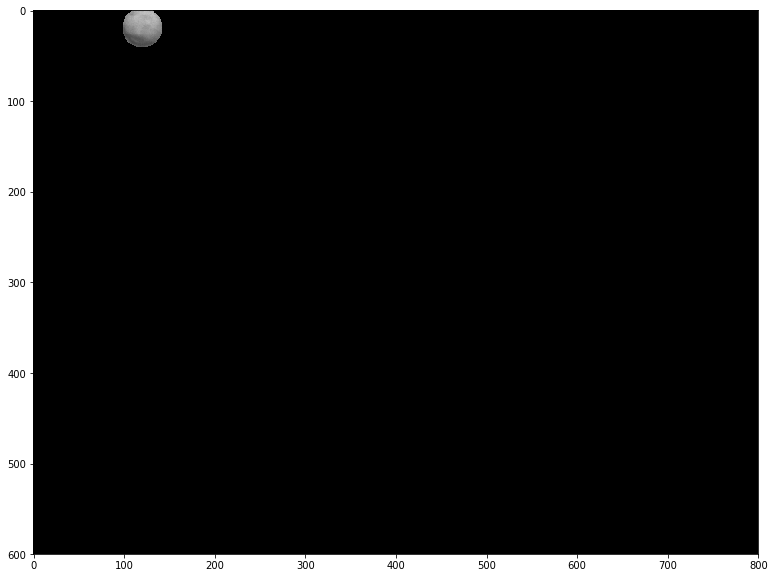

In [154]:
plt.gray()
plt.imshow(mask[:,:,0]*img, vmax=255, vmin=0)

In [189]:
def crop_by_masks (img, masks, keep=True):
    output = []
    for i in range(masks.shape[-1]):
        mask = masks[:,:,i]
        bbox = mask_bounding_box(mask)
        tmp = np.zeros((bbox[3], bbox[2]))
        if keep:
            tmp = (img)[ bbox[1]:(bbox[1]+bbox[3]), bbox[0]:(bbox[0]+bbox[2])]
        else:
            tmp = (img*mask)[ bbox[1]:(bbox[1]+bbox[3]), bbox[0]:(bbox[0]+bbox[2])]
        output.append(tmp)
    return np.ravel(output)
def mask_bounding_box(mask):
    r,c = np.nonzero(mask)
    
    xmin = np.min(c)
    xmax = np.max(c)
    ymin = np.min(r)
    ymax = np.max(r)
    return (xmin, ymin, xmax-xmin, ymax-ymin)

In [190]:
cropped = crop_by_masks(img, mask)

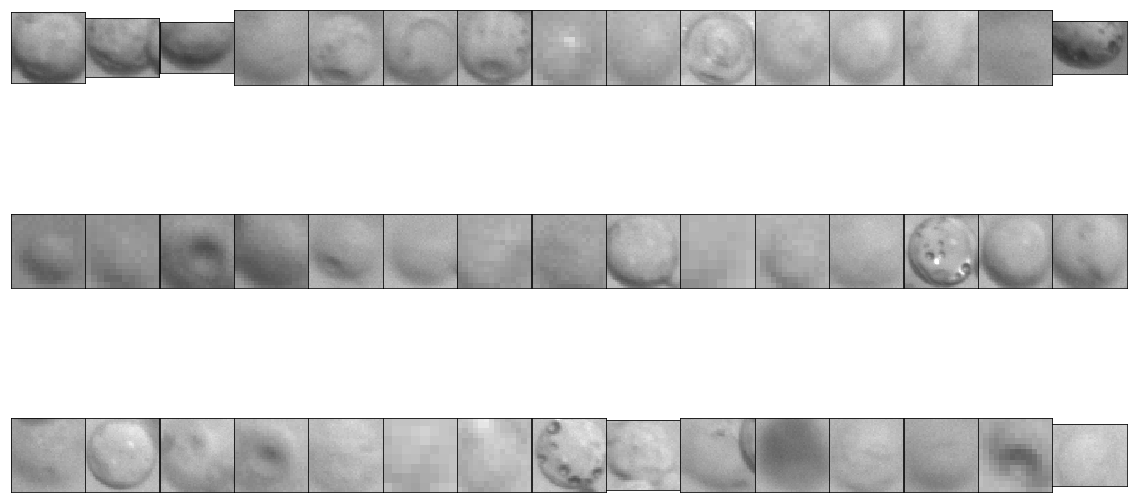

In [191]:
fig, axs = plt.subplots(3, cropped.shape[-1]//3)
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i,a in enumerate(axs):
    a.imshow(cropped[i], vmax=255, vmin=0, cmap="gray")
    a.xaxis.set_visible(False)
    a.yaxis.set_visible(False)

In [192]:
selected = cropped[27]

In [225]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-90,90), mode='constant'),
    iaa.Scale((0.75, 1.0))
])

In [226]:
dseq = seq.to_deterministic()

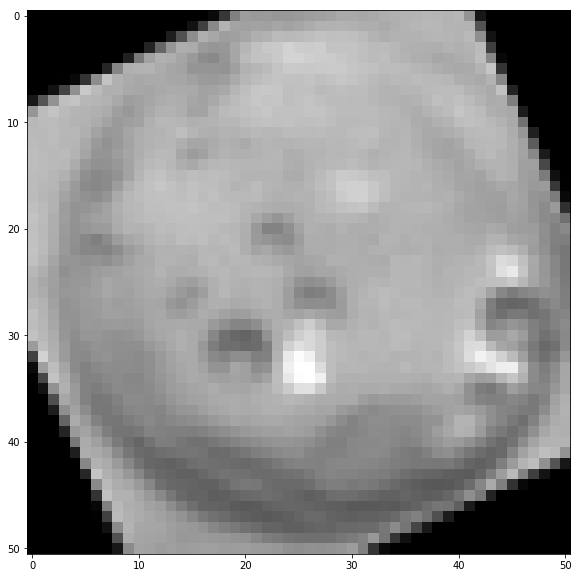

In [227]:
augmented_img = seq.augment_image(selected)
plt.imshow(augmented_img, cmap="gray")